VGG 16 Classifier

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models,metrics
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from packaging import version
%load_ext tensorboard
!rm -rf ./logs/ 


TensorFlow 2.x selected.


Import Data from drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
PATH_OF_DATA= '/content/gdrive/"My Drive"/garythung-trashnet'
!ls {PATH_OF_DATA}

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
models	models1  test_set  train_set


Model Defination

In [0]:
def VGG_16(weights_path=None):
    from tensorflow.keras.models import Sequential

    from tensorflow.keras.layers import Flatten, Dense, Dropout

    from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D

    model = Sequential()

    model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))

    model.add(Convolution2D(64, 3, 3, activation='relu',padding='same'))

    # model.add(ZeroPadding2D((1,1)))

    model.add(Convolution2D(64, 3, 3, activation='relu',padding='same'))

    model.add(MaxPooling2D((2,2), strides=(2,2)))



    model.add(ZeroPadding2D((1,1)))

    model.add(Convolution2D(128, 3, 3, activation='relu',padding='same'))

    model.add(ZeroPadding2D((1,1)))

    model.add(Convolution2D(128, 3, 3, activation='relu',padding='same'))

    model.add(MaxPooling2D((2,2), strides=(2,2)))



    model.add(ZeroPadding2D((1,1)))

    model.add(Convolution2D(256, 3, 3, activation='relu',padding='same'))

    model.add(ZeroPadding2D((1,1)))

    model.add(Convolution2D(256, 3, 3, activation='relu',padding='same'))

    model.add(ZeroPadding2D((1,1)))

    model.add(Convolution2D(256, 3, 3, activation='relu',padding='same'))

    model.add(MaxPooling2D((2,2), strides=(2,2)))



    model.add(ZeroPadding2D((1,1)))

    model.add(Convolution2D(512, 3, 3, activation='relu',padding='same'))

    model.add(ZeroPadding2D((1,1)))

    model.add(Convolution2D(512, 3, 3, activation='relu',padding='same'))

    model.add(ZeroPadding2D((1,1)))

    model.add(Convolution2D(512, 3, 3, activation='relu',padding='same'))

    model.add(MaxPooling2D((2,2), strides=(2,2)))



    model.add(ZeroPadding2D((1,1)))

    model.add(Convolution2D(512, 3, 3, activation='relu',padding='same'))

    model.add(ZeroPadding2D((1,1)))

    model.add(Convolution2D(512, 3, 3, activation='relu',padding='same'))

    model.add(ZeroPadding2D((1,1)))

    model.add(Convolution2D(512, 3, 3, activation='relu',padding='same'))

    model.add(MaxPooling2D((2,2), strides=(2,2)))



    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(4096, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(6, activation='softmax'))

    return model

In [4]:
model1=tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 5s 0us/step


In [0]:
model = tf.keras.models.Sequential()
for layer in model1.layers[:-1]:
  model.add(layer)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [0]:
for layer in model.layers:
  layer.trainable=False

In [0]:
model.add(tf.keras.layers.Dense(6,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory("/content/gdrive/My Drive/garythung-trashnet/train_set",
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode="categorical",
                                                shuffle=True
                                                )
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory("/content/gdrive/My Drive/garythung-trashnet/test_set",
                                                target_size=(224, 224),
                                                batch_size=32)


Found 2060 images belonging to 6 classes.
Found 490 images belonging to 6 classes.


In [0]:
checkpoint_path = "/content/gdrive/My Drive/garythung-trashnet/models1/classifiervgg.ckpt" 
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0002),
              loss='categorical_crossentropy',metrics=['accuracy'])
model.load_weights(checkpoint_path)

In [28]:


STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=test_set.n//test_set.batch_size
history=model.fit_generator(generator=training_set,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks = [cp_callback])

Epoch 1/10
63/64 [============================>.] - ETA: 1s - loss: 0.5100 - accuracy: 0.8156
Epoch 00001: saving model to /content/gdrive/My Drive/garythung-trashnet/models1/classifiervgg.ckpt
64/64 [==============================] - 87s 1s/step - loss: 0.5123 - accuracy: 0.8141 - val_loss: 1.2588 - val_accuracy: 0.5938
Epoch 2/10
63/64 [============================>.] - ETA: 1s - loss: 0.5720 - accuracy: 0.7851
Epoch 00002: saving model to /content/gdrive/My Drive/garythung-trashnet/models1/classifiervgg.ckpt
64/64 [==============================] - 86s 1s/step - loss: 0.5691 - accuracy: 0.7860 - val_loss: 1.0594 - val_accuracy: 0.6792
Epoch 3/10
63/64 [============================>.] - ETA: 1s - loss: 0.6008 - accuracy: 0.7700
Epoch 00003: saving model to /content/gdrive/My Drive/garythung-trashnet/models1/classifiervgg.ckpt
64/64 [==============================] - 86s 1s/step - loss: 0.6003 - accuracy: 0.7712 - val_loss: 1.2467 - val_accuracy: 0.6479
Epoch 4/10
63/64 [=============

In [14]:
!ls {'content/gdrive/"My Drive"/garythung-trashnet/models'}

ls: cannot access 'content/gdrive/My Drive/garythung-trashnet/models': No such file or directory


In [15]:

model.load_weights(checkpoint_path)


Accuracy

{'loss': [0.5320773185827793, 0.5317804849829665, 0.5645841698086944, 0.5442906700412667, 0.5255589017853934], 'accuracy': [0.7924063, 0.79585797, 0.7928994, 0.7978304, 0.80473375], 'val_loss': [0.9503461996714274, 1.0247215350468954, 1.0118873635927836, 1.1517273426055907, 0.9957771142323811], 'val_accuracy': [0.73333335, 0.7083333, 0.73333335, 0.65, 0.71666664]}


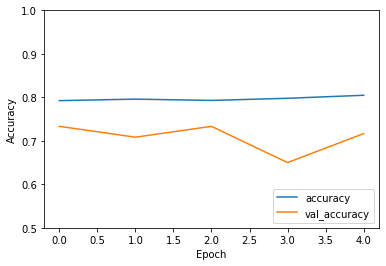

In [23]:


print(history.history)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


Loss

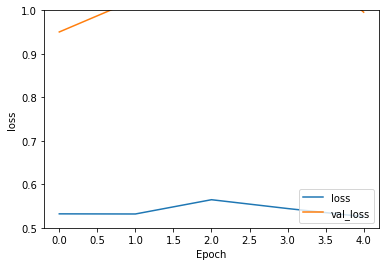

In [24]:
plt.figure
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [11]:
test = test_datagen.flow_from_directory("/content/gdrive/My Drive/garythung-trashnet/test_set",
                                                target_size=(224, 224),
                                                batch_size=490)


Found 490 images belonging to 6 classes.


In [0]:

test_img,test_label=next(test)
y_pred=model.predict_classes(test_img)

In [13]:
# y_pred=np.round(model.predict_generator(test,steps=1))
test.class_indices
test_loss, test_acc = model.evaluate(test_img,  test_label)
print(test_acc)

490/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [14]:
print(test_loss)

1.0642329084629916


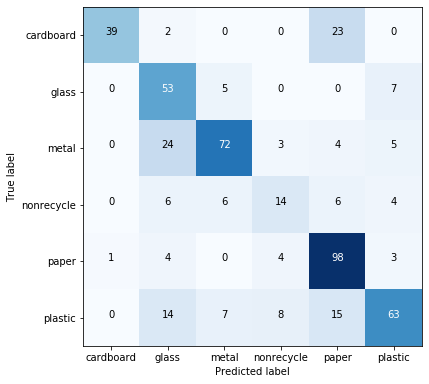

In [15]:
test_p=[]
for i in range(test_label.shape[0]):
  flag=0
  for j in range(test_label.shape[1]):
      if(test_label[i][j]==1):
        test_p.append(j)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
con_mat = confusion_matrix(test_p,y_pred)
def plot_confusion_matrix(cm,
                          target_names):

	cmap = plt.get_cmap('Blues')

	plt.figure(figsize=(6, 6))
	plt.imshow(cm, interpolation='nearest', cmap=cmap)

	if target_names is not None:
		tick_marks = np.arange(len(target_names))
		plt.xticks(tick_marks, target_names)
		plt.yticks(tick_marks, target_names)

	thresh = cm.max() / 2
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, "{:,}".format(cm[i, j]),
					horizontalalignment="center",
					color="white" if cm[i, j] > thresh else "black")
	
	plt.ylabel('True label')
	plt.xlabel('Predicted label')
	plt.tight_layout()
	plt.show()
 
labels = ['cardboard','glass','metal','nonrecycle','paper','plastic']
plot_confusion_matrix(con_mat, labels)

In [18]:
print(classification_report(test_p, y_pred, target_names=labels))

              precision    recall  f1-score   support

   cardboard       0.97      0.61      0.75        64
       glass       0.51      0.82      0.63        65
       metal       0.80      0.67      0.73       108
  nonrecycle       0.48      0.39      0.43        36
       paper       0.67      0.89      0.77       110
     plastic       0.77      0.59      0.67       107

    accuracy                           0.69       490
   macro avg       0.70      0.66      0.66       490
weighted avg       0.73      0.69      0.69       490

